In [6]:
## Example of a Linear SVM Classifier (SVC) with hard margin decision boundaries

In [51]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, color='yellow')
    plt.plot(x0, decision_boundary, "k-",linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--",linewidth=2)

In [64]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
#print(iris)
X = iris["data"][:, (2, 3)]  # petal length, petal width
#print(X)

y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
#the hyperparameter control the margin violations
#smaller C leads to more margin violations but wider street
#C can be inferred
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

svm_clf.predict([[2.4, 3.1]])

#SVM classifiers do not output a probability like logistic regression classifiers

array([1])

[-2, 2, -2, 2]

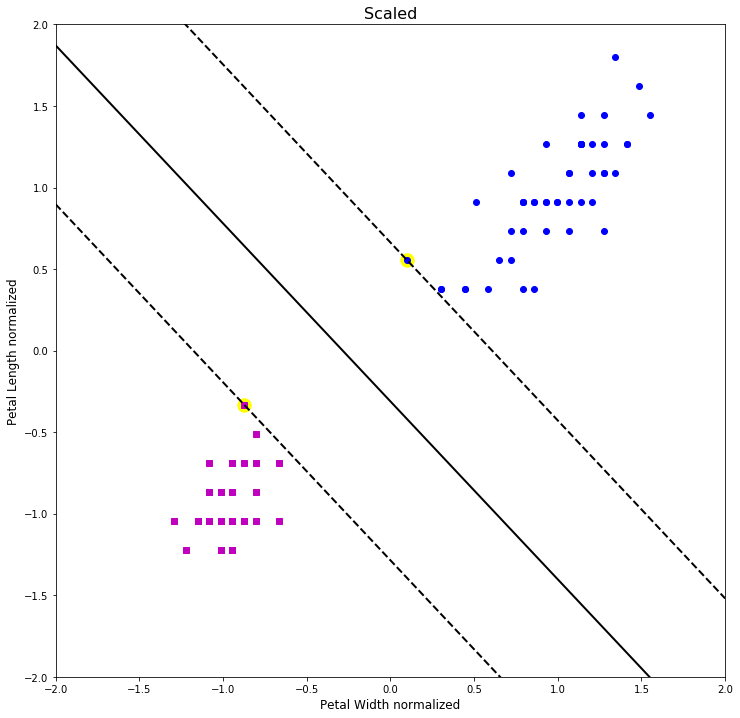

In [79]:
#plot the decision boundaries
import numpy as np

plt.figure(figsize=(12,12))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf.fit(X_scaled, y)

plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1],"bo" )
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])